# Best approximation

The result of census of the population of Switzerland between 1900 and 2010 (in thousands) is summarized in the following table:

|	year	|	population	|
|-----------|---------------|
|	1900	|	3315	|
|	1910	|	3753	|
|	1920	|	3880	|
|	1930	|	4066	|
|	1941	|	4266	|
|	1950	|	4715	|
|	1960	|	5429	|
|	1970	|	6270	|
|	1980	|	6366	|
|	1990	|	6874	|
|	2000	|	7288	|
|	2010	|	7783	|


* Is it possible to estimate the number of inhabitants of Switzerland
during the year when there has not been census, for example in 1945
and 1975?

* Is it possible to predict the number of inhabitants of Switzerland in
2020?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
year = np.array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = np.array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

We could try with interpolation; noting that we have many points we need a high degree interpolant

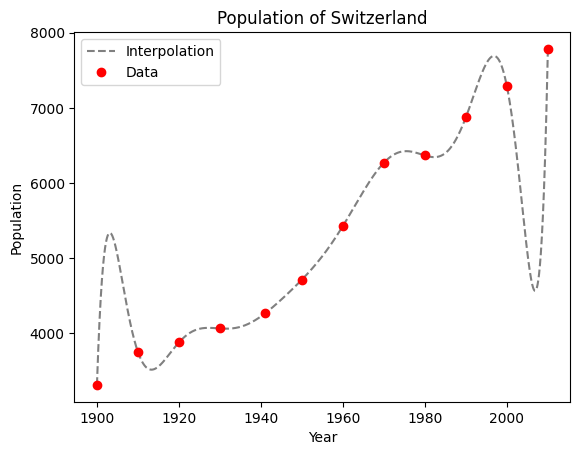

In [3]:
from interpolation import lagrange_interp

# Interpolate the population data using Lagrange interpolation
# and plot the result
x = np.arange(year[0], year[-1], 0.01)
y = lagrange_interp(year, population, x)

fig, ax = plt.subplots()
ax.plot(x, y, label='Interpolation', color='gray', linestyle='--')
ax.plot(year, population, 'ro', label='Data')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Population of Switzerland')
ax.legend()
plt.show()

Clearly, there are some issues with the interpolation. The large oscillations are not representative of the data.

# Approximation by least squares

Another approach to best approximate discrete data is that known as approximation by _least squares_.

Given $n+1$ data points $\{x_i,y_i\}_{i=0}^n$, we fix a function space $V_m$ of finite dimension $m+1$ with $m<n$ and we want to determine $f_m \in V_m$ such that 
$$
\sum_{i=0}^{n}\left[ y_i - f_m(x_i) \right]^2 \leq \sum_{i=0}^{n}\left[ y_i - g_m(x_i) \right]^2,\quad \forall g_m \in V_m.
$$

Having equipped $V_m$ with a basis $\{\phi_0,\phi_1,\ldots,\phi_m\}$, the above is equivalent to finding $(c_0^*,c_1^*,\ldots,c_m^*) \in \mathbb{R}^{m+1}$ such that 
$$
\sum_{i=0}^{n}\left[ y_i - \sum_{j=0}^m c_j^* \phi_j(x_i) \right]^2 \leq \sum_{i=0}^{n}\left[ y_i - \sum_{j=0}^m c_j \phi_j(x_i) \right]^2,\quad \forall (c_0,c_1,\ldots,c_m) \in \mathbb{R}^{m+1}.
$$

Having defined the matrix 
$$
B = 
\begin{bmatrix}
\phi_0(x_1)	& \phi_1(x_1)	& \cdots	& \phi_m(x_1)	\\
\phi_0(x_2)	& \phi_1(x_2)	& \cdots	& \phi_m(x_2)	\\
\vdots		& \vdots		& 			& \vdots		\\
\phi_0(x_n)	& \phi_1(x_n)	& \cdots 	& \phi_m(x_n)	
\end{bmatrix} \in \mathbb{R}^{(n+1)\times (m+1)},
$$
the above problem can be written as a minimization problem for the functional $\Phi(c_0,\ldots,c_m)$
$$
\min_{c \in \mathbb{R}^{m+1}} \Phi(c_0,\ldots,c_m),\quad \Phi(c_0,\ldots,c_m) = \Vert y - A c \Vert^2
$$

A necessary condition for minimimality is of course that 
$$
\frac{\partial \Phi(c)}{\partial c_k} \Bigg\vert_{c=c^*} = 0,\quad \forall k=0,\ldots,m,
$$
which in turns gives the following linear condition
$$
B^T B c^* = B^T y,
$$
known as _system of normal equations_.

## Example

Let us reconsider the previous example and find the best __quadratic__ fit for the data by least squares

[[1.000000e+00 1.900000e+03 3.610000e+06]
 [1.000000e+00 1.910000e+03 3.648100e+06]
 [1.000000e+00 1.920000e+03 3.686400e+06]
 [1.000000e+00 1.930000e+03 3.724900e+06]
 [1.000000e+00 1.941000e+03 3.767481e+06]
 [1.000000e+00 1.950000e+03 3.802500e+06]
 [1.000000e+00 1.960000e+03 3.841600e+06]
 [1.000000e+00 1.970000e+03 3.880900e+06]
 [1.000000e+00 1.980000e+03 3.920400e+06]
 [1.000000e+00 1.990000e+03 3.960100e+06]
 [1.000000e+00 2.000000e+03 4.000000e+06]
 [1.000000e+00 2.010000e+03 4.040100e+06]]
[[ 5.01596699e+05]
 [-5.49899802e+02]
 [ 1.51387713e-01]]


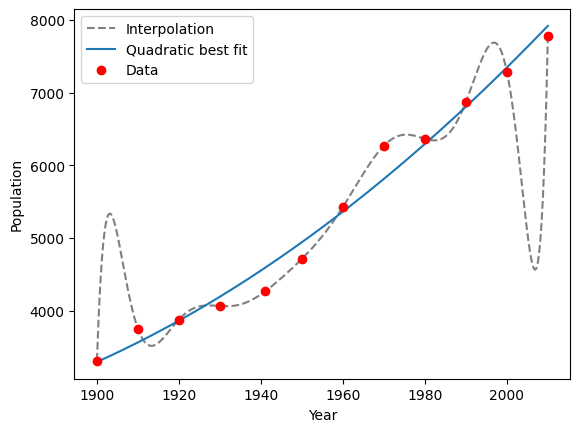

In [5]:
n = len(year) # Number of data points

# Create the matrix B
B = np.matrix([np.ones(n), year, year**2]).T
print(B)

# Calculate the coefficients
coeff = np.linalg.solve(B.T@B, B.T@np.matrix(population).T)
print(coeff)

poly = lambda x : coeff[0, 0] + coeff[1, 0]*x + coeff[2, 0]*x**2 

fig, ax = plt.subplots()
ax.plot(x, lagrange_interp(year, population, x), label='Interpolation', color='gray', linestyle='--')
ax.plot(x, poly(x), label='Quadratic best fit')
ax.plot(year, population, 'ro', label='Data')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.legend()	
plt.show()

Now try with order 3

[[1.00000000e+00 1.90000000e+03 3.61000000e+06 6.85900000e+09]
 [1.00000000e+00 1.91000000e+03 3.64810000e+06 6.96787100e+09]
 [1.00000000e+00 1.92000000e+03 3.68640000e+06 7.07788800e+09]
 [1.00000000e+00 1.93000000e+03 3.72490000e+06 7.18905700e+09]
 [1.00000000e+00 1.94100000e+03 3.76748100e+06 7.31268062e+09]
 [1.00000000e+00 1.95000000e+03 3.80250000e+06 7.41487500e+09]
 [1.00000000e+00 1.96000000e+03 3.84160000e+06 7.52953600e+09]
 [1.00000000e+00 1.97000000e+03 3.88090000e+06 7.64537300e+09]
 [1.00000000e+00 1.98000000e+03 3.92040000e+06 7.76239200e+09]
 [1.00000000e+00 1.99000000e+03 3.96010000e+06 7.88059900e+09]
 [1.00000000e+00 2.00000000e+03 4.00000000e+06 8.00000000e+09]
 [1.00000000e+00 2.01000000e+03 4.04010000e+06 8.12060100e+09]]
[[ 2.68023533e+07]
 [-4.09237713e+04]
 [ 2.08066454e+01]
 [-3.52175353e-03]]


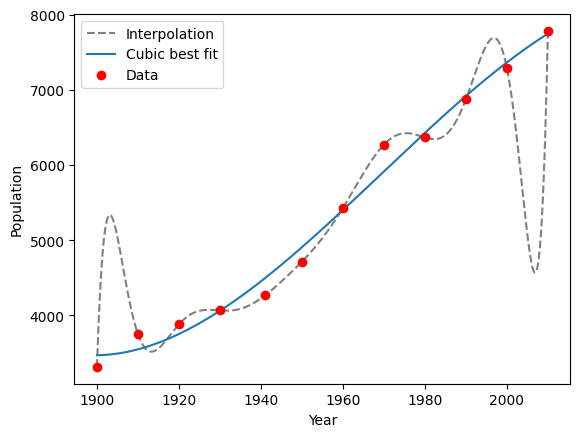

In [8]:
B = np.matrix([np.ones(n), year, year**2, year**3]).T
print(B)
# Calculate the coefficients
coeff = np.linalg.solve(B.T@B, B.T@np.matrix(population).T)
print(coeff)
poly = lambda x : coeff[0, 0] + coeff[1, 0]*x + coeff[2, 0]*x**2 + coeff[3, 0]*x**3
fig, ax = plt.subplots()
ax.plot(x, lagrange_interp(year, population, x), label='Interpolation', color='gray', linestyle='--')
ax.plot(x, poly(x), label='Cubic best fit')
ax.plot(year, population, 'ro', label='Data')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.legend()	
plt.show()

## Comparison
Let's generalize to every degree

In [9]:
def best_fit(x, y, degree, xq):
	
	assert len(x) == len(y)
	assert degree > 0
	assert degree < len(x)
	n = len(x)

	x = np.float64(x)
	y = np.float64(y)
	xq = np.float64(xq)

	B = np.matrix([x**i for i in range(degree+1)]).T
	BT = B.T
	coeff = np.linalg.solve(BT*B, BT*np.matrix(y).T)
	coeff = list(coeff.flat)
	return sum([coeff[i]*xq**i for i in range(degree+1)])

C:\Users\COCIANCICH\AppData\Local\Temp\ipykernel_18312\2688134185.py:7: RankWarning: Polyfit may be poorly conditioned
  ax.plot(x,np.polyval(np.polyfit(year, population, deg), x), label='Polyfit')


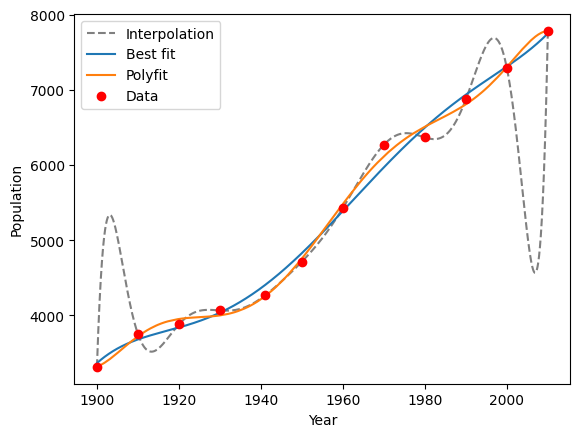

In [12]:
## Compare with np.polyfit
deg = 10

fig, ax = plt.subplots()
ax.plot(x, lagrange_interp(year, population, x), label='Interpolation', color='gray', linestyle='--')
ax.plot(x, best_fit(year, population, deg, x), label='Best fit')
ax.plot(x,np.polyval(np.polyfit(year, population, deg), x), label='Polyfit')
ax.plot(year, population, 'ro', label='Data')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.legend()	
plt.show()

[1900 1910 1920 1930 1941 1945 1950 1960 1970 1980 1990 2000 2010]
[3315 3753 3880 4066 4266 3500 4715 5429 6270 6366 6874 7288 7783]


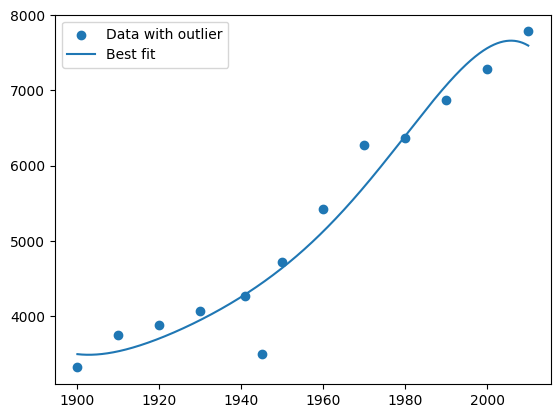

In [25]:
year_n= np.concatenate((year[:5], np.array([1945]), year[5:]))
print(year_n)
population_n= np.concatenate((population[:5], np.array([3500]), population[5:]))
print(population_n)
plt.scatter(year_n, population_n, label='Data with outlier')
#plt.plot(x, lagrange_interp(year_n, population_n, x), label='Interpolation', color='gray', linestyle='--')
plt.plot(x, best_fit(year_n, population_n, deg, x), label='Best fit')
plt.legend()
plt.show()

[1900 1910 1920 1930 1941 1945 1950 1960 1970 1980 1990 2000 2010]
